In [1]:
# Import the necessary libraries and load the files needed for EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.patches as mpatches


In [2]:
df = pd.read_csv('Resources/HH_Provider_Jan2023.csv')


In [3]:
# Set the below parameters so that all rows and columns would be visible

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Calculate the number of rows and columns in the dataset

df.shape


(11609, 64)

In [5]:
df.head()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,Footnote for quality of patient care star rating,How often the home health team began their patients care in a timely manner,Footnote for how often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,Footnote for how often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,Footnote for how often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,Footnote for how often patients got better at walking or moving around,How often patients got better at getting in and out of bed,Footnote for how often patients got better at getting in and out of bed,How often patients got better at bathing,Footnote for how often patients got better at bathing,How often patients breathing improved,Footnote for how often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,Footnote Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Footnote for how often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Footnote for Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,Footnote for DTC Risk-Standardized Rate,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,Footnote for PPR Risk-Standardized Rate,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
0,AK,27001,PROVIDENCE HOME HEALTH ALASKA,"4001 DALE STREET, SUITE 101",ANCHORAGE,99508,9.075630e+09,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,5/17/1982,4.5,NaN,91.2,NaN,99.7,NaN,44.3,NaN,89.0,NaN,90.8,NaN,89.9,NaN,96.5,NaN,95.4,NaN,14.9,NaN,14.2,NaN,0.4,NaN,90.0,NaN,1.7,NaN,99.3,NaN,253.0,302.0,83.77,89.37,84.85,93.37,Better Than National Rate,NaN,5.0,3

In [6]:
df.tail()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,Footnote for quality of patient care star rating,How often the home health team began their patients care in a timely manner,Footnote for how often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,Footnote for how often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,Footnote for how often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,Footnote for how often patients got better at walking or moving around,How often patients got better at getting in and out of bed,Footnote for how often patients got better at getting in and out of bed,How often patients got better at bathing,Footnote for how often patients got better at bathing,How often patients breathing improved,Footnote for how often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,Footnote Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Footnote for how often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Footnote for Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,Footnote for DTC Risk-Standardized Rate,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,Footnote for PPR Risk-Standardized Rate,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
11604,WY,537304,PREMIER HOME HEALTH INC,"487A NORTH MAIN, STE 2",THAYNE,83127,3.078836e+09,PROPRIETARY,Yes,Yes,Yes,Yes,No,Yes,9/14/2000,2.0,NaN,96.5,NaN,99.1,NaN,60.3,NaN,67.4,NaN,52.6,NaN,67.7,NaN,45.2,NaN,65.4,NaN,10.8,NaN,12.3,NaN,0.0,NaN,93.9,NaN,2.6,NaN,100.0,NaN,61.0,77.0,79.22,74.69,66.10,81.07,Same As National Rate,NaN,3.0,125.0,2.40,3.55,2.48,5.22,Same As National Rate,N

### Remove cells that will not be related to further analysis


In [7]:
columns_to_drop = ['Footnote for quality of patient care star rating',
                  'Footnote for how often the home health team began their patients care in a timely manner',
                  'Footnote for how often the home health team taught patients (or their family caregivers) about their drugs',
                  'Footnote for how often the home health team determined whether patients received a flu shot for the current flu season',
                  'Footnote for how often patients got better at walking or moving around',
                  'Footnote for how often patients got better at getting in and out of bed',
                  'Footnote for how often patients got better at bathing',
                  'Footnote for how often patients breathing improved',
                  'Footnote for how often patients got better at taking their drugs correctly by mouth',
                  'Footnote for how often home health patients had to be admitted to the hospital',
                  'Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted',
                  'Footnote Changes in skin integrity post-acute care: pressure ulcer/injury',
                  'Footnote for how often physician-recommended actions to address medication issues were completely timely',
                  'Footnote for Percent of Residents Experiencing One or More Falls with Major Injury',
                  'Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function',
                  'Footnote for DTC Risk-Standardized Rate',
                  'Footnote for PPR Risk-Standardized Rate',
                  'Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']

df.drop(columns = columns_to_drop, inplace = True)

In [8]:
df.shape


(11609, 46)

In [9]:
df.head()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
0,AK,27001,PROVIDENCE HOME HEALTH ALASKA,"4001 DALE STREET, SUITE 101",ANCHORAGE,99508,9.075630e+09,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,5/17/1982,4.5,91.2,99.7,44.3,89.0,90.8,89.9,96.5,95.4,14.9,14.2,0.4,90.0,1.7,99.3,253.0,302.0,83.77,89.37,84.85,93.37,Better Than National Rate,5.0,337.0,1.48,2.92,2.14,4.01,Same As National Rate,0.89,500.0
1,AK,27002,HOSPICE & HOME CARE OF JUNEAU,1803 GLACIER HIGHWAY,JUNEAU,99801,9.074633e+09,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,12/27/1982,2.0,94.4,81.8,60.2,55.3,67.5,57.9,50.6,62.5,10.0,16.1,1.4,96.0,2.4,100.0,60.0,86.0,69.77,73.14,62.75,81.72,Same As National Rate,2.0,76.0,2.63,3.37,2.31,4.82,Same As National Rate,0.85,220.0
2,AK,27006,FAIRBANKS MEMORIAL HOSPITAL HHA,1701 GILLAM WAY,FAIRBANKS,99701,9.074585e+09,VOLUNTARY NON-PROFIT - OTHER,Yes,Yes,No,No,Yes,Yes,9/19/1985,2.0,71.9,98.4,53.8,68.7,70.1,64.4,72.4,58.7,16.4,25.2,1.5,96.1,2.8,98.0,110.0,129.0,85.27,87.59,79.40,92.77,Better Than National Rate,1.0,153.0,0.65,3.02,2.12,4.43,Same As National Rate,0.74,224.0
3,AK,27008,ANCORA HOME HEALTH & HOSPICE,2851 E PALMER-WASILLA HWY,WASILLA,99654,9.073525e+09,PROPRIETARY,Yes,Yes,Yes,Yes,Yes,Yes,1/22/1987,4.0,97.9,99.8,55.7,84.7,87.4,89.2,86.2,88.8,11.9,12.6,0.2,99.7,1.8,100.0,403.0,518.0,77.80,86.77,83.13,90.28,Better Than National Rate,15.0,459.0,3.27,3.18,2.28,4.34,Same As National Rate,0.97,852.0
4,AK,27009,PETERSBURG MEDICAL CENTER HOME,P.O. BOX 589,PETERSBURG,99833,9.077724e+09,GOVERNMENT - STATE/COUNTY,Yes,Yes,Yes,Yes,No,No,7/21/1987,2.0,89.9,95.9,38.1,67.5,79.4,70.8,72.1,59.8,20.9,13.4,0.0,91.1,6.3,100.0,16.0,37.0,43.24,49.52,34.23,63.21,Worse Than National Rate,NaN,6.0,NaN,NaN,NaN,NaN,Not Available,1.09,85.0


In [10]:
df.tail()


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
11604,WY,537304,PREMIER HOME HEALTH INC,"487A NORTH MAIN, STE 2",THAYNE,83127,3.078836e+09,PROPRIETARY,Yes,Yes,Yes,Yes,No,Yes,9/14/2000,2.0,96.5,99.1,60.3,67.4,52.6,67.7,45.2,65.4,10.8,12.3,0.0,93.9,2.6,100.0,61.0,77.0,79.22,74.69,66.10,81.07,Same As National Rate,3.0,125.0,2.40,3.55,2.48,5.22,Same As National Rate,1.13,159.0
11605,WY,537831,BEST HOME HEALTH & HOSPICE LLC,105 YELLOW CREEK ROAD,EVANSTON,82930,3.077893e+09,PROPRIETARY,Yes,Yes,Yes,Yes,Yes,Yes,12/16/2004,2.5,99.2,97.5,55.5,75.4,77.8,70.6,60.0,54.1,11.6,14.2,0.0,94.4,4.2,99.7,102.0,182.0,56.04,58.57,50.89,66.03,Worse Than National Rate,1.0,165.0,0.61,3.01,2.01,4.16,Same As National Rate,0.90,516.0
11606,WY,537833,PREMIUM HEALTH AT HOME INC,1262 N 22ND ST,LARAMIE,82072,3.077459e+09,PROPRIETARY,Yes,Yes,No,No,No,Yes,7/14/2009,NaN,33.3,83.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.3,0.0,83.3,14.0,20.0,70.00,75.66,56.73,89.40,Same As National Rate,0.0,20.0,0.00,3.32,2.35,4.73,Same As National Rate,0.87,33.0
11607,WY,537834,PREMIUM HEALTH AT HOME RAWLINS LLC,1904 EDINBURGH ST,RAWLINS,82301,3.073249e+09,PROPRIETARY,Yes,Yes,No,No,No,No,9/13/2011,NaN,50.0,87.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,90.0,3.6,100.0,NaN,13.0,NaN,NaN,NaN,NaN,Not Available,NaN,16.0,NaN,NaN,NaN,NaN,Not Available,1.37,28.0
11608,WY,537835,ECLIPSE HOME HEALTH,"304 COFFEEN AVENUE, SUITE B",SHERIDAN,82801,NaN,-,-,-,-,-,-,-,12/9/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11609 entries, 0 to 11608
Data columns (total 46 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                    --------------  -----  
 0   State                                                                                                                                                     11609 non-null  object 
 1   CMS Certification Number (CCN)                                                                                                                            11609 non-null  int64  
 2   Provider Name                                                                                                                                             

In [12]:
df.describe()


,CMS Certification Number (CCN),ZIP,Phone,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
count,11609.000000,11609.000000,1.094800e+04,7786.000000,8419.000000,8399.000000,8075.000000,7846.000000,7816.000000,7869.000000,7674.000000,7739.000000,6861.000000,6861.000000,7915.000000,8423.000000,8407.000000,8423.000000,7248.000000,9249.000000,7248.000000,7248.000000,7248.000000,7248.000000,6290.000000,8983.000000,6290.000000,6290.000000,6290.000000,6290.000000,8393.000000,9414.000000
mean,342764.924800,60242.427599,6.144806e+09,3.249743,94.127771,96.900691,71.859356,77.846941,79.067694,80.683607,78.400404,74.704161,13.995817,11.383763,0.401693,91.848831,1.028845,97.691511,237.881898,244.428695,71.779083,76.794280,68.510509,83.876076,13.742448,285.587443,3.680211,3.421261,2.470162,4.721854,0.972535,485.166348
std,225151.461639,26919.107532,2.452492e+09,1.022742,8.995277,7.584678,18.511704,14.878897,14.947192,14.873205,17.943180,16.448971,3.991187,4.293047,0.764933,15.069560,1.211546,7.821118,462.119037,522.238890,16.053716,14.569428,16.930562,12.095530,30.081077,730.595302,2.595420,0.335000,0.305674,0.483990,0.138200,865.438835
min,17000.000000,612.000000,1.956281e+09,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.680000,2.510000,5.410000,0.000000,1.000000,0.000000,2.320000,1.690000,3.010000,0.320000,1.000000
25%,147214.000000,36608.000000,3.863275e+09,2.500000,92.700000,97.200000,63.700000,71.700000,73.300000,75.300000,72.500000,66.100000,11.600000,8.700000,0.000000,92.300000,0.000000,98.600000,40.000000,25.000000,65.710000,71.287500,60.737500,79.380000,2.000000,14.000000,2.210000,3.230000,2.280000,4.440000,0.890000,72.000000
50%,347071.000000,67202.000000,6.269157e+09,3.500000,97.800000,99.200000,74.600000,81.100000,83.200000,84.300000,83.700000,77.900000,13.900000,11.300000,0.100000,97.200000,0.800000,99.800000,101.000000,88.000000,75.835000,81.110000,73.460000,87.050000,5.000000,71.000000,3.290000,3.390000,2.400000,4.750000,0.980000,226.000000
75%,537063.000000,83263.000000,8.185884e+09,4.000000,99.600000,99.900000,84.200000,87.600000,88.600000,90.300000,90.100000,86.100000,16.100000,13.900000,0.500000,99.100000,1.400000,100.000000,255.000000,254.000000,82.212500,86.560000,80.740000,91.67

In [13]:
df.dtypes


State                                                                                                                                                        object
CMS Certification Number (CCN)                                                                                                                                int64
Provider Name                                                                                                                                                object
Address                                                                                                                                                      object
City                                                                                                                                                         object
ZIP                                                                                                                                                           int64
Phone           

In [14]:
# Check if there are any missing values

df.isnull().sum()


State                                                                                                                                                          0
CMS Certification Number (CCN)                                                                                                                                 0
Provider Name                                                                                                                                                  0
Address                                                                                                                                                        0
City                                                                                                                                                           0
ZIP                                                                                                                                                            0
Phone                             

###  Create Star Rating DataFrame to look at the correlation of star rating measures to the star rating

In [15]:
# Create the star_rating_df DataFrame.
star_rating_df = df[['Quality of patient care star rating', 
                     'How often the home health team began their patients care in a timely manner',
                    'How often patients got better at walking or moving around',
                    'How often patients got better at getting in and out of bed',
                    'How often patients got better at bathing',
                    'How often patients breathing improved',
                    'How often patients got better at taking their drugs correctly by mouth',
                    'How often home health patients had to be admitted to the hospital']].copy()
star_rating_df.head()

,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
0,4.5,91.2,89.0,90.8,89.9,96.5,95.4,14.9
1,2.0,94.4,55.3,67.5,57.9,50.6,62.5,10.0
2,2.0,71.9,68.7,70.1,64.4,72.4,58.7,16.4
3,4.0,97.9,84.7,87.4,89.2,86.2,88.8,11.9
4,2.0,89.9,67.5,79.4,70.8,72.1,59.8,20.9


In [16]:
star_rating_corr = star_rating_df.corr()
star_rating_corr

,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
Quality of patient care star rating,1.000000,0.433344,0.821845,0.756807,0.821046,0.751005,0.810462,-0.187728
How often the home health team began their patients care in a timely manner,0.433344,1.000000,0.302806,0.250379,0.307788,0.255505,0.293271,-0.002059
How often patients got better at walking or moving around,0.821845,0.302806,1.000000,0.808585,0.862053,0.729698,0.753123,-0.018372
How often patients got better at getting in and out of bed,0.756807,0.250379,0.808585,1.000000,0.784608,0.707212,0.701502,0.016229
How often patients got better at bathing,0.821046,0.307788,0.862053,0.784608,1.000000,0.761498,0.764294,-0.031767
How often patients breathing improved,0.751005,0.255505,0.729698,0.707212,0.761498,1.000000,0.681671,-0.004590
How often patients got better at taking their drugs correctly by mouth,0.810462,0.293271,0.753123,0.701502,0.764294,0.681671,1.000000,-0.005155
How often home health patients had to be admitted to the hospital,-0.187728,-0.002059,-0.018372,0.016229,-0.031767,-0.004590,-0.005155,1.000000


[Text(0, 0.5, 'Quality of patient care star rating'),
 Text(0, 1.5, 'How often the home health team began their patients care in a timely manner'),
 Text(0, 2.5, 'How often patients got better at walking or moving around'),
 Text(0, 3.5, 'How often patients got better at getting in and out of bed'),
 Text(0, 4.5, 'How often patients got better at bathing'),
 Text(0, 5.5, 'How often patients breathing improved'),
 Text(0, 6.5, 'How often patients got better at taking their drugs correctly by mouth'),
 Text(0, 7.5, 'How often home health patients had to be admitted to the hospital')]

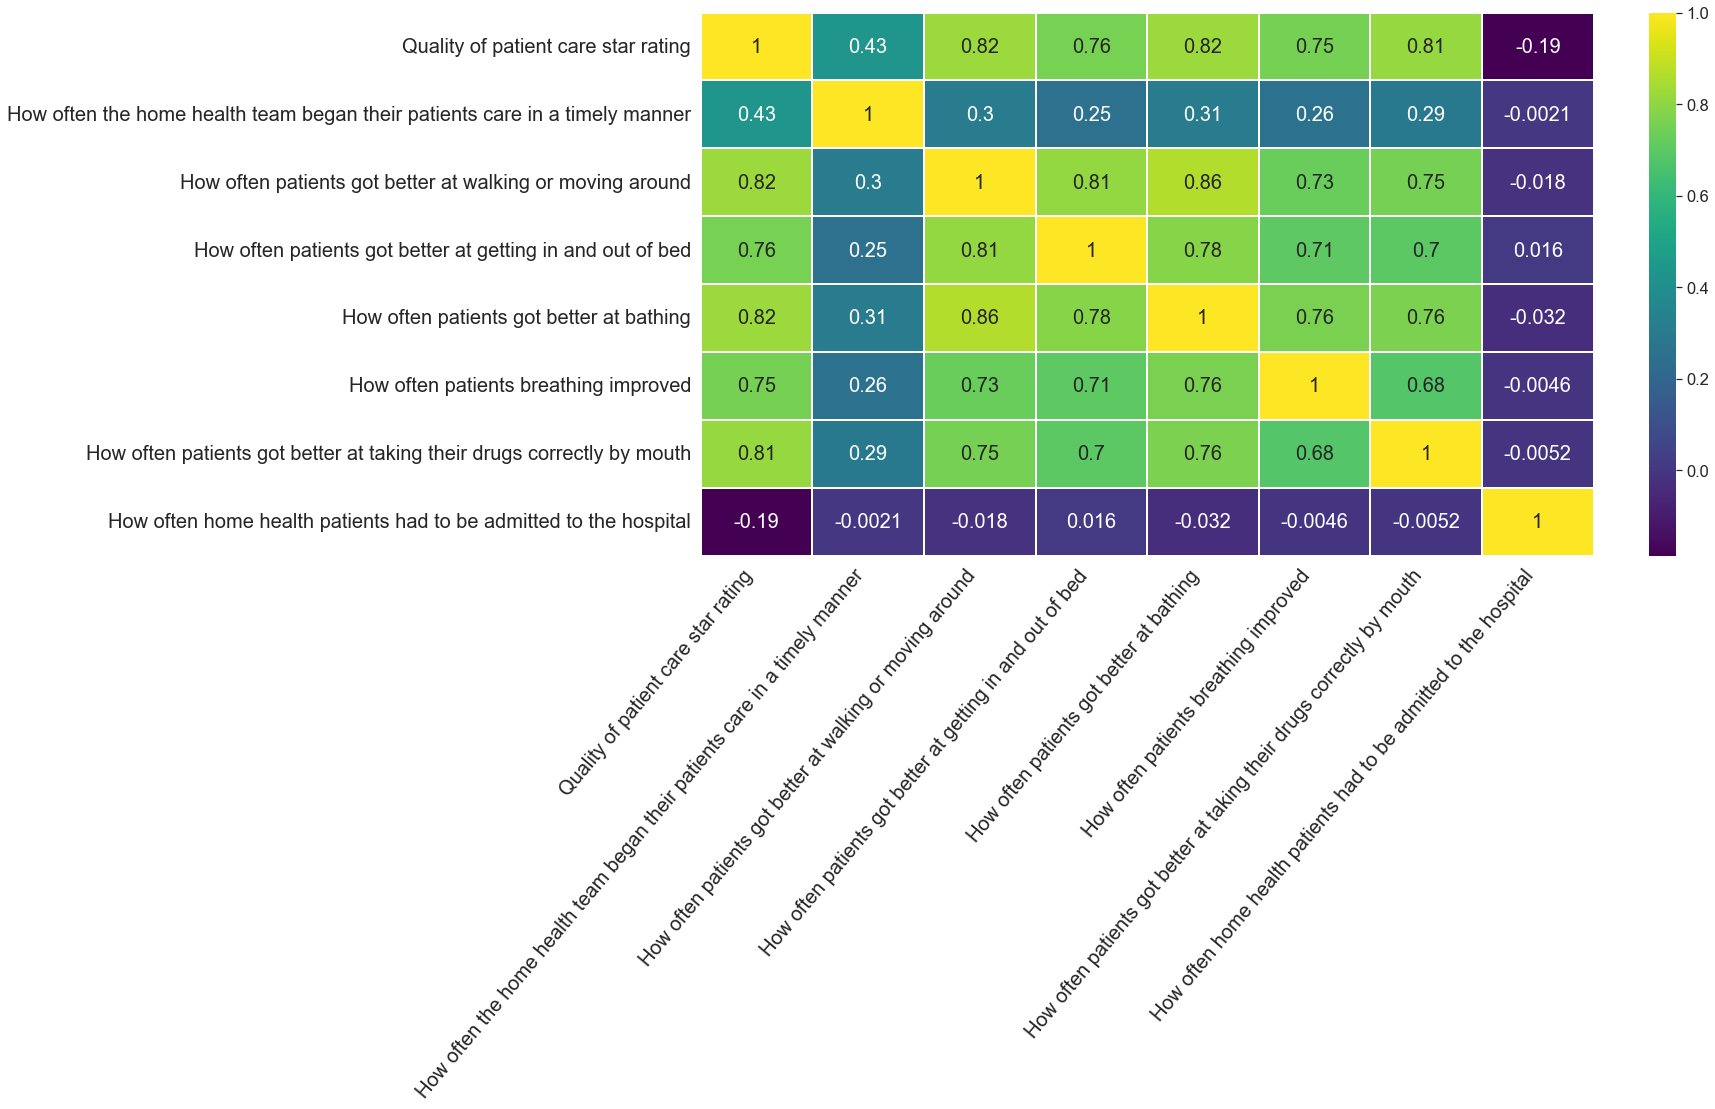

In [24]:
fig, ax = plt.subplots(figsize = (20, 10))

# Sample figsize in inches

sns.set(font_scale = 1.5)

g = sns.heatmap(star_rating_corr, xticklabels = star_rating_corr.columns, yticklabels = star_rating_corr.columns, 
            annot = True, linewidths = .2, ax = ax, cmap = 'viridis', annot_kws={'size': 20})
g.set_xticklabels(g.get_xticklabels(), rotation = 50, fontsize = 20, ha = "right")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20, va = "center")


In [18]:
star_rating_df.describe()


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,7786.000000,8419.000000,7846.000000,7816.000000,7869.000000,7674.000000,7739.000000,6861.000000
mean,3.249743,94.127771,77.846941,79.067694,80.683607,78.400404,74.704161,13.995817
std,1.022742,8.995277,14.878897,14.947192,14.873205,17.943180,16.448971,3.991187
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,92.700000,71.700000,73.300000,75.300000,72.500000,66.100000,11.600000
50%,3.500000,97.800000,81.100000,83.200000,84.300000,83.700000,77.900000,13.900000
75%,4.000000,99.600000,87.600000,88.600000,90.300000,90.100000,86.100000,16.100000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,38.800000


### Quality Star Rating Distribution


In [19]:
star_rating = pd.DataFrame(df['Quality of patient care star rating'].value_counts())
star_rating


,Quality of patient care star rating
3.5,1298
3.0,1239
4.0,1205
2.5,1042
4.5,1024
2.0,802
1.5,555
5.0,488
1.0,133


Text(0.5, 1.0, 'Quality Star Rating Distribution')

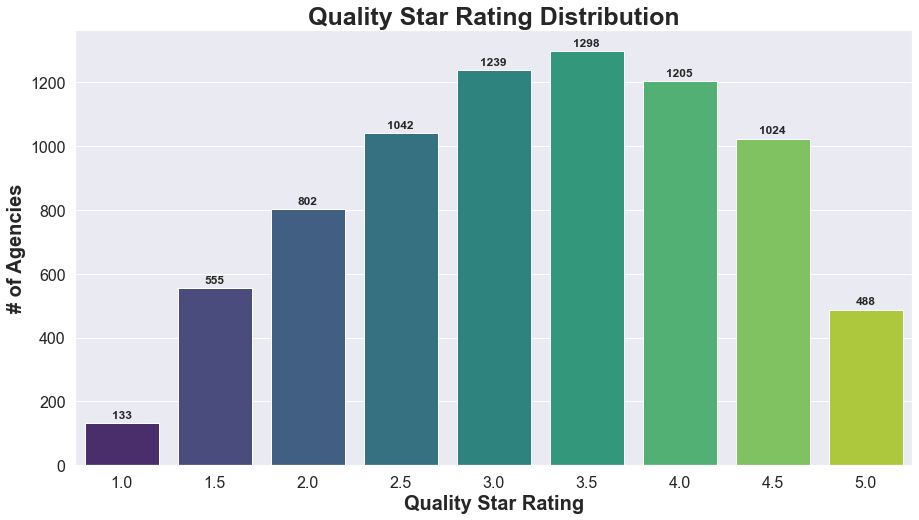

In [20]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = df, palette = 'viridis')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 12, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 20, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 20, fontweight = 'bold')
plt.title('Quality Star Rating Distribution', size = 25, fontweight = 'bold')
